## Bike Sharing Assignment
### Submitted by Rahul Gupta

In [120]:
# First Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [121]:
#IMport file and load it in to a data frame
data = pd.read_csv('day.csv')

In [122]:
# Read first 10 record and see how data looks like
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [123]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [124]:
# Undertand the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [125]:
# review the shape
data.shape

(730, 16)

In [126]:
# review the columns and its Data type
data.info()
# no null values found so we don't have to check null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [127]:
#Data cleaning activty

In [128]:
#Post data analysis, it seems there are three columns that do not adding any value,it can be dropped 
#'instant', 'dteday','casual','registered' - considering Casual + Registereed = cnt

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [129]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [130]:
#verify dropped columns
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [132]:
#let's check the coorelation
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [133]:
#Check null values
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [134]:
#let's analyze the data to see if any duplicates available
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

<Figure size 1500x3000 with 0 Axes>

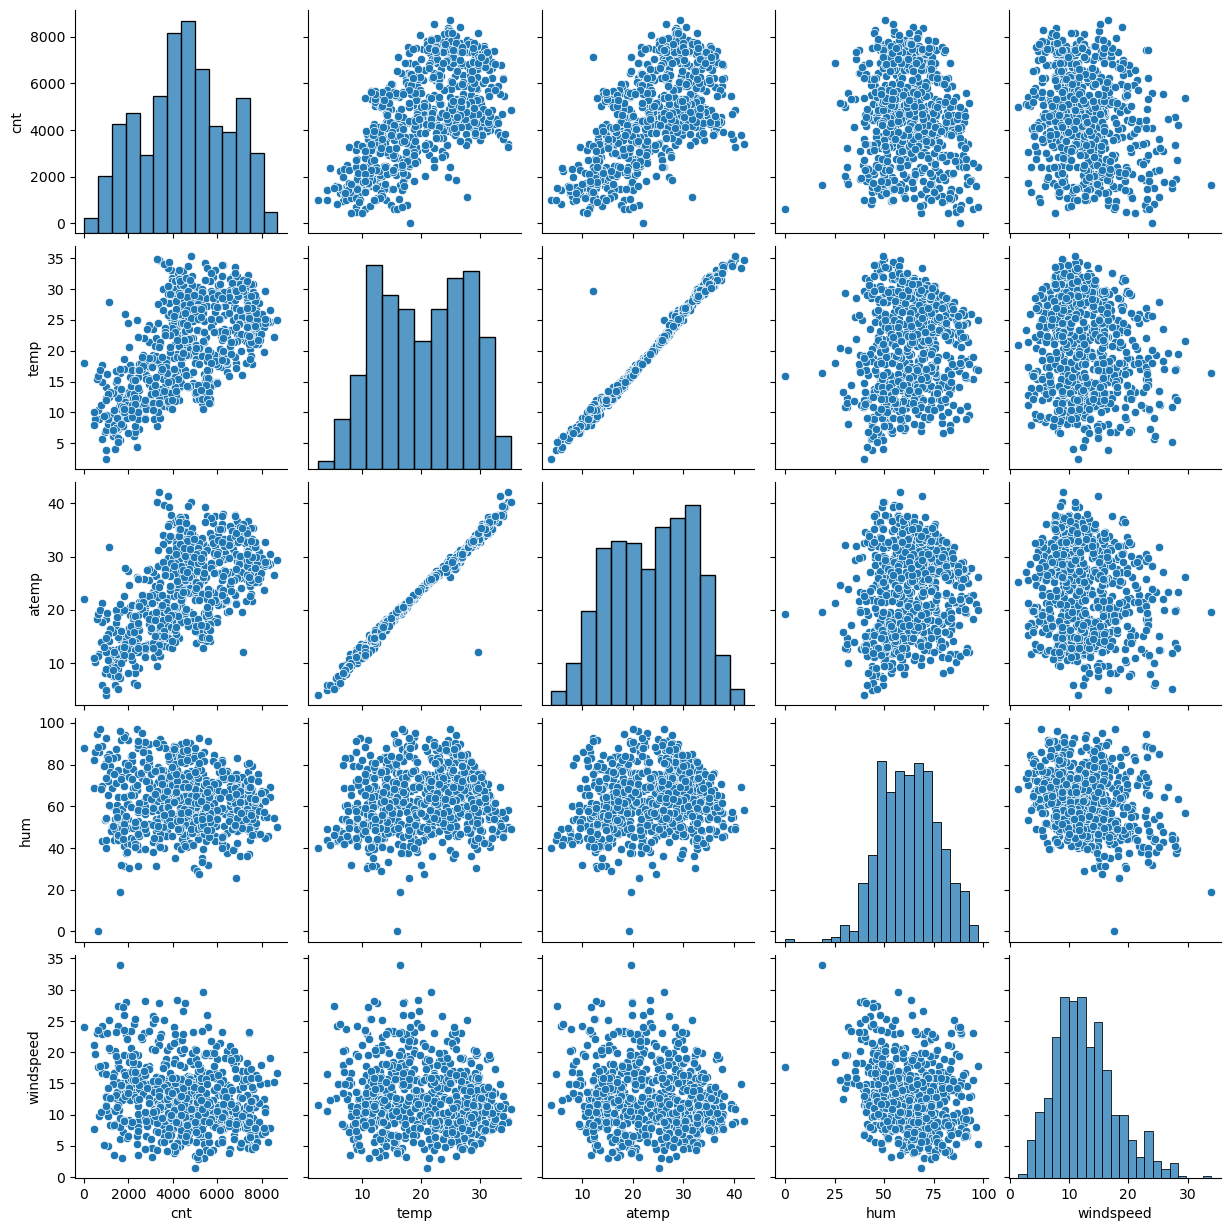

In [135]:
# let's check the linear relationship using pairplot of numerical variables
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [136]:
# Evident that there is alinear relationship between TEMP and ATEMP

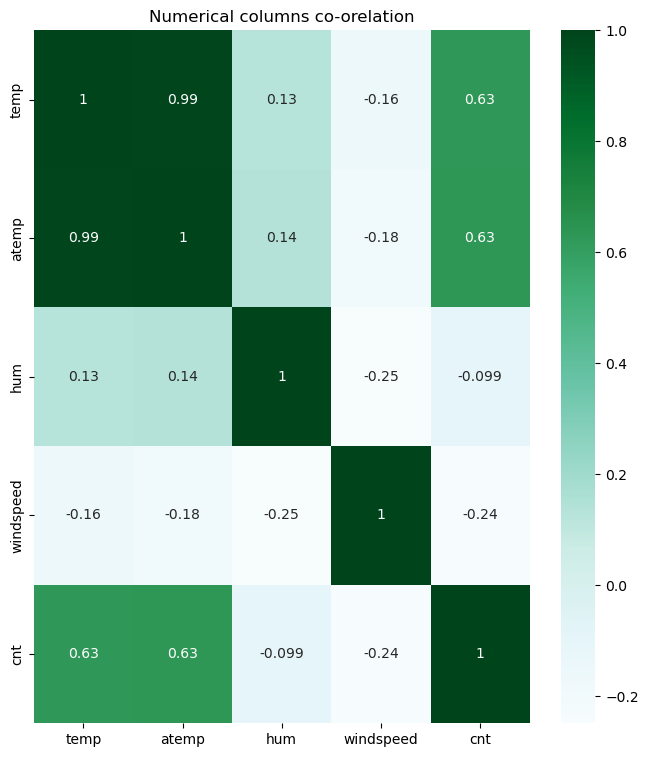

In [137]:
#let's drawheamap for finding co-relation between numerical variable

numerical_cols = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(8,9))
plt.title("Numerical columns co-orelation")
sns.heatmap(data[numerical_cols].corr(),annot= True,cmap="BuGn")
plt.show()

In [138]:
#Here we see that temp and atemp has correlation more than .99 means almost 
#1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

# Draw Heatmap of correlation between variables

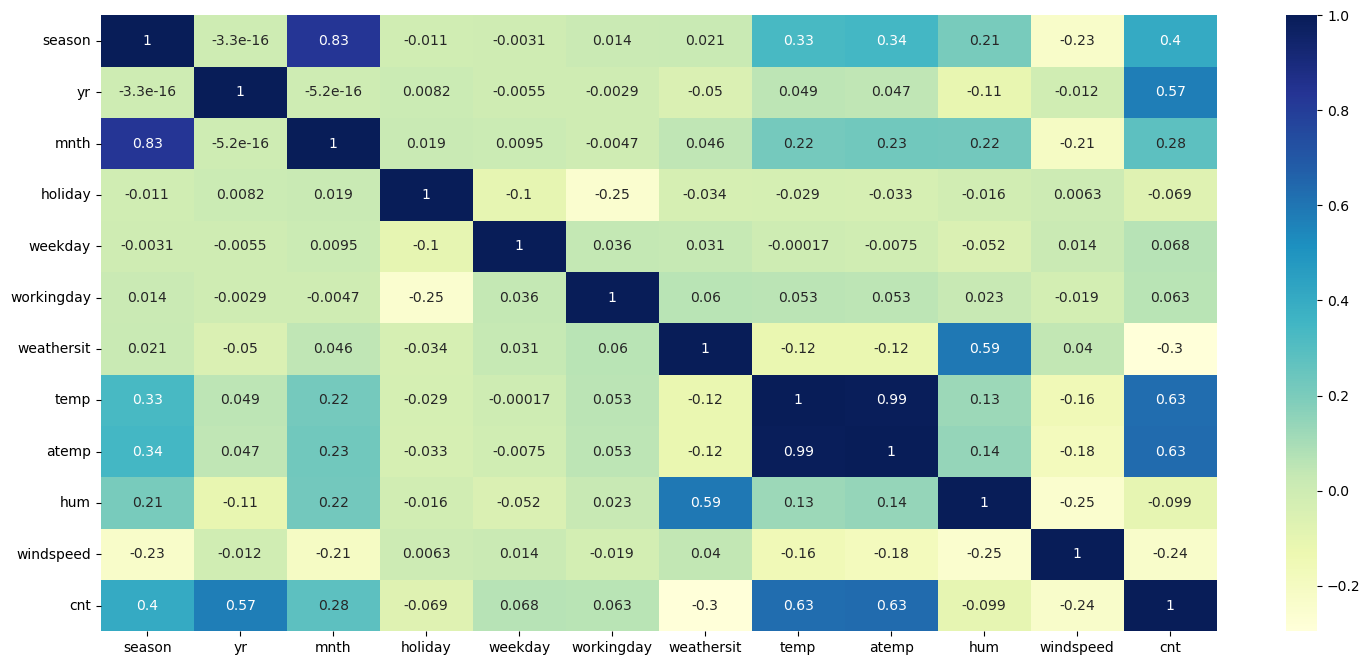

In [140]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu' )
plt.show()

In [141]:
# Since temp, atemp has a stronger co-relation, let's delete

<Axes: xlabel='weathersit', ylabel='cnt'>

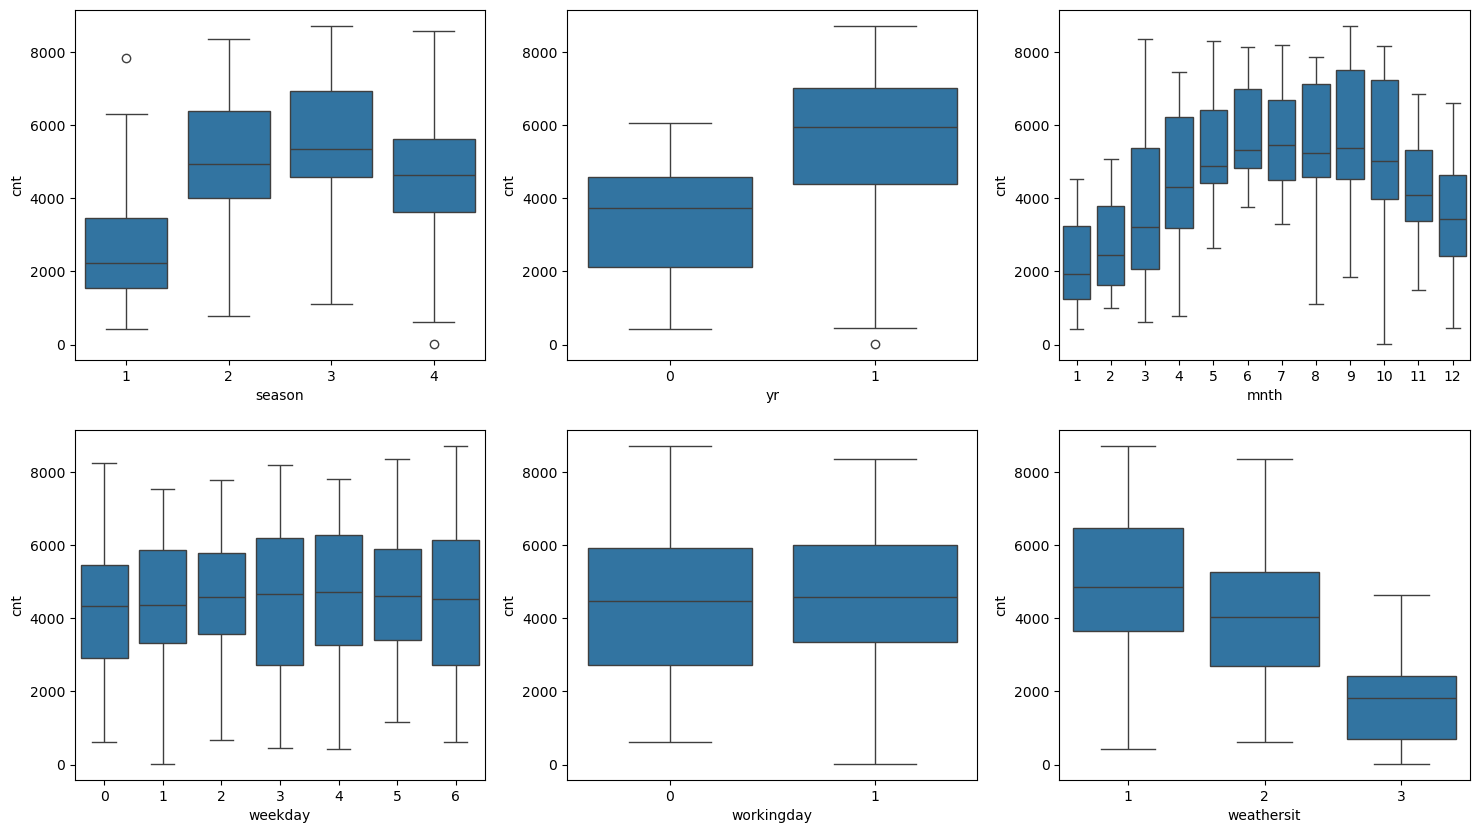

In [142]:
# let's check the categorical variables box plot to see the demands

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)

In [143]:
# after anlalyzing above box plots, here are some of the observations
#1 - Demand goes up during fall season
#2 - Demand will go up next year
#3 -  Sept month has got the highest denand
#4 -  Cann't really conclude much looking at weekday boxplot
#5 -   Demand slighly less duinrg working days
#6 - When the weather is good, demand goes up, and vice-versa if weather is bad


In [144]:
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [145]:
# Now let's start preparing for Linear Regression model, let's create the dummy variables first 
data = pd.get_dummies(data=data,columns=["season","mnth","weekday"],drop_first=True)
data= pd.get_dummies(data=data,columns=["weathersit"])


In [146]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [147]:
data.shape

(730, 31)

In [148]:
# Now let's seperate out the train & test data for futher analysis and model setup

# Split the data for training & testing, normally we follow 70:30 rule
X_train, X_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [149]:
#let's check the shape distribution as per 70.30 rule
print(X_train.shape)
print(X_test.shape)

(510, 31)
(219, 31)


In [150]:
# Scale to fit
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [151]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
#After fitting the scalar, check the max = 1 above
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,False,False,...,False,True,False,False,False,False,False,False,False,True
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,False,True,...,False,False,False,False,False,False,True,False,True,False
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,False,False,...,False,False,False,False,True,False,False,False,False,True
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,False,False,...,False,False,False,False,False,False,True,False,True,False
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,True,False,...,False,False,False,True,False,False,False,False,False,True
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,False,False,...,False,False,False,False,False,True,False,False,True,False
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,False,True,...,False,False,False,True,False,False,False,False,True,False
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,False,False,...,False,False,False,False,False,False,True,False,False,True


In [153]:
#plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
#sns.heatmap(X_train.corr(), annot = True)
#plt.show()
X_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,False,False,False,False,False,True,False,False,True,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,False,True,False,False,True,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,...,False,False,False,True,False,False,False,False,True,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,...,False,False,True,False,False,False,False,False,False,True
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,True,...,False,False,False,False,False,False,False,False,False,True
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,False,False,...,False,False,True,False,False,False,False,False,True,False
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,False,True,...,False,False,False,False,False,False,True,False,True,False
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,False,True,...,False,False,False,False,False,False,True,False,True,False
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,False,True,...,False,False,False,False,False,False,True,False,False,True


In [154]:
# Build a Linear Regression model using SKLearn for RFE
y_train = X_train.pop('cnt')
X_train = X_train
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [155]:
# Model building using RFE

In [156]:
#Cut down number of features to 15 using automated approach
#rfe = RFE(lr,15)
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [158]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [159]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [160]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train.astype(float), X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

In [161]:
#Function to calculate VIFs and print them

def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [162]:
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring','season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          2.77e-187
Time:                        15:00:40   Log-Likelihood:                 507.40
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1856    

In [163]:
#Model 1 analysis
# let's remove holiday as it has negative cofficient & high p value
cols = ['yr','temp', 'atemp', 'hum', 'windspeed', 'season_spring','season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          8.30e-186
Time:                        15:00:40   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1870    

In [164]:
#Model 2 analysis
# let's remove mnth_dec as it has negative cofficient and high p value
cols = ['yr','temp', 'atemp', 'hum', 'windspeed', 'season_spring','season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.29e-186
Time:                        15:00:40   Log-Likelihood:                 499.03
No. Observations:                 510   AIC:                            -972.1
Df Residuals:                     497   BIC:                            -917.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1827    

In [165]:
#Model 3 analysis
# let's remove humidity as it has negative cofficient and high p value
cols = ['yr','temp', 'atemp', 'windspeed', 'season_spring','season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          2.20e-183
Time:                        15:00:41   Log-Likelihood:                 489.80
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     498   BIC:                            -904.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0985    

In [166]:
#Model 4 analysis
# let's remove atemp as it has a high p value
cols = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.72e-184
Time:                        15:00:41   Log-Likelihood:                 489.57
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     499   BIC:                            -910.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1000    

In [167]:
#Model 5 analysis

# let's remove month_sept as it has -ve cofficent and high pvalue
cols = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'mnth_nov', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.78e-183
Time:                        15:00:41   Log-Likelihood:                 484.28
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     500   BIC:                            -906.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1010    

In [168]:
#Model 6 analysis

# let's remove month_nov as it has -ve cofficent and high pvalue
cols = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.04e-183
Time:                        15:00:41   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0980    

In [169]:
#Model 7 analysis
# let's remove weathersite_good as it has a very high VIF
cols = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'weathersit_bad',  'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.04e-183
Time:                        15:00:41   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2491    

In [170]:
## Conclusion
# P Value is close to 0.0 for all the features mostly 
# Not a big between R-squared and Adjusted R-squared values, meaning no more feature elimination required 
# Within the range VIF 
# Hence, we can say that this model can be accepted


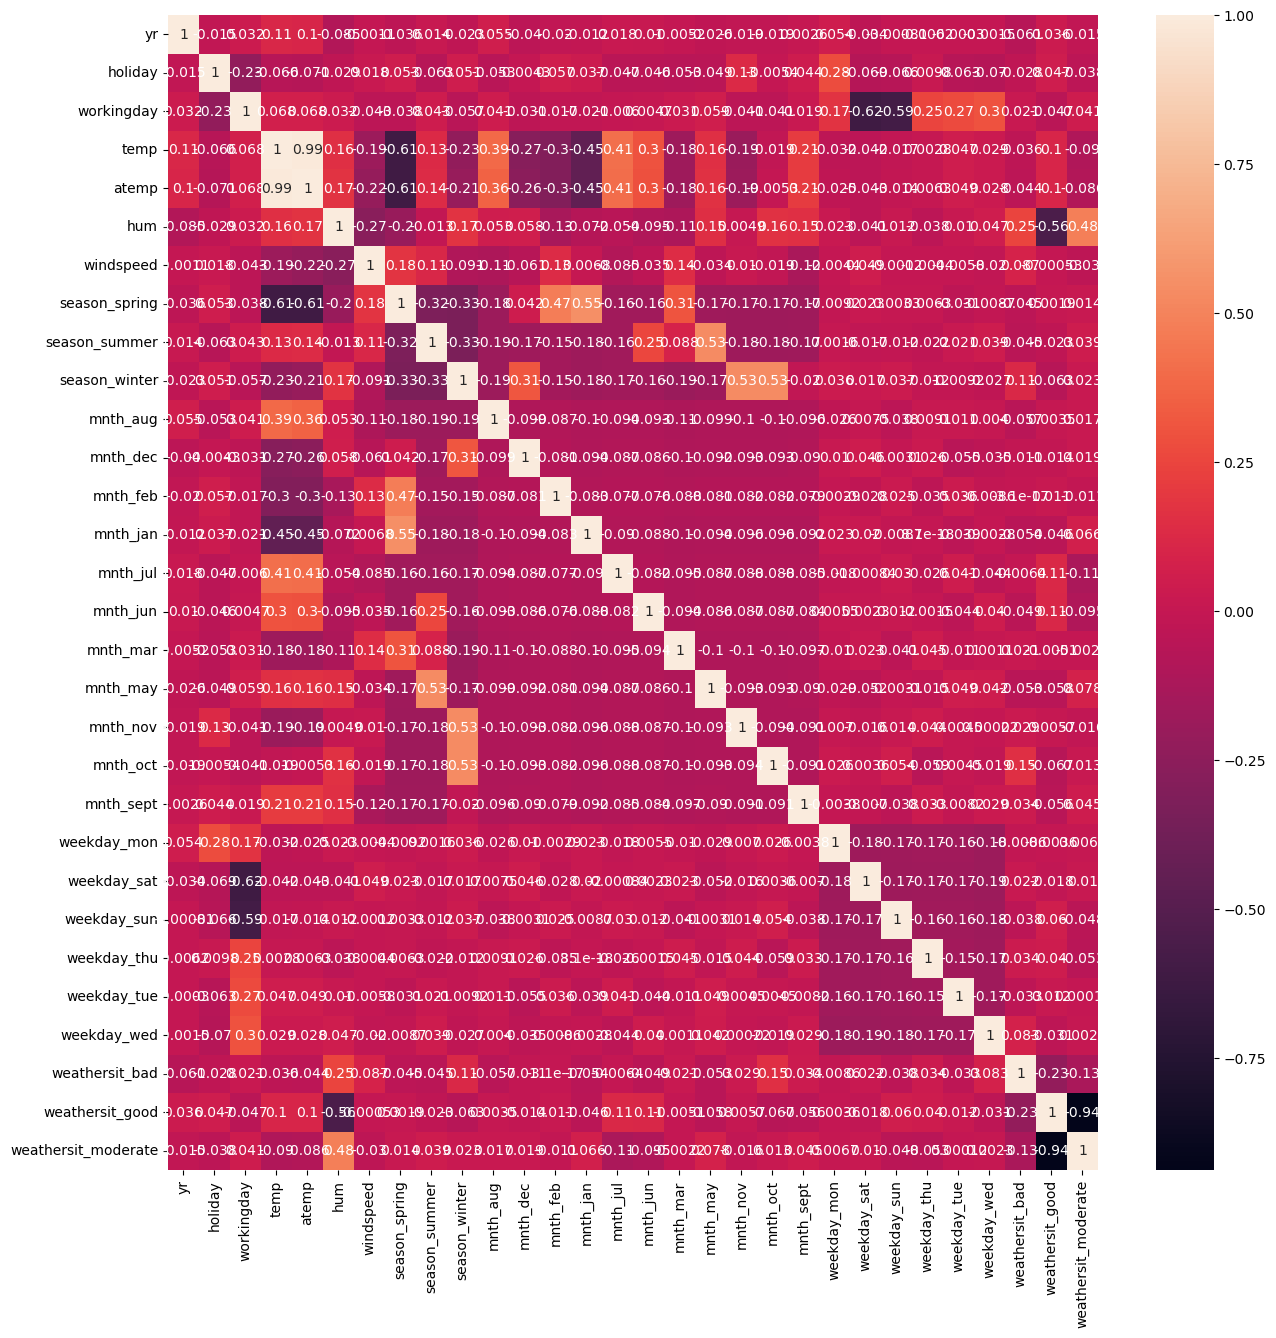

In [171]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [172]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [173]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
final_col = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'weathersit_bad',  'weathersit_moderate']

lr = build_model_sk(X_train[final_col],y_train)
print(lr.intercept_,lr.coef_)

0.249059010734141 [ 0.23392759  0.46883372 -0.14924682 -0.11475327  0.04369545 -0.08294674
 -0.27739952 -0.07789715]


In [174]:
# Model Evaluation:
# Since we have created the model, let's begin with residual analysis
y_train_pred = lr.predict(X_train[final_col])


<Axes: xlabel='cnt', ylabel='Density'>

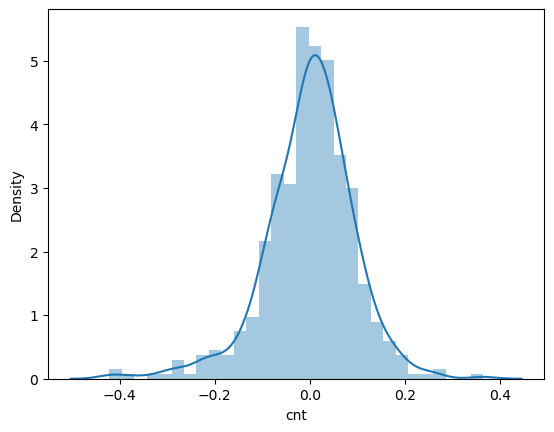

In [175]:
res =  y_train - y_train_pred
sns.distplot(res)

In [176]:
#Prediction & evaluation based on test set

In [177]:

#Scale to fit
num_vars = ['temp','atemp','hum','windspeed','cnt']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [178]:
#cols from our final model
final_col = ['yr','temp','windspeed', 'season_spring','season_winter', 'mnth_jul', 'weathersit_bad',  'weathersit_moderate']
y_test_pred = lr.predict(X_test[final_col])

In [179]:
#r2_score(y_test,y_test_pred)

In [180]:
#conclusion
# focus or expand more duirng spring season, & next year will be more demand of bikesharing 
# less bokking during bad weather like too much cold or raining
